## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

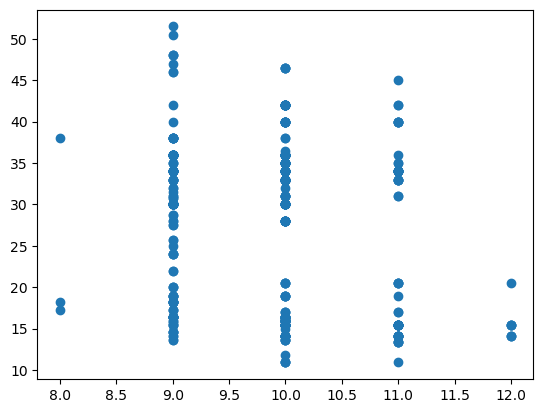

In [3]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

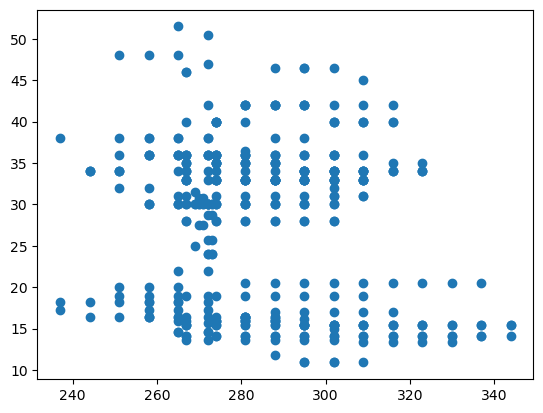

In [4]:

plt.scatter('DayOfYear','Price',data=new_pumpkins)

## Linear Regression Line

The goal of a linear regression exercise is to be able to plot a line to:

- Show variable relationships. Show the relationship between variables
- Make predictions. Make accurate predictions on where a new datapoint would fall in relationship to that line.

It is typical of Least-Squares Regression to draw this type of line. The term 'least-squares' means that all the datapoints surrounding the regression line are squared and then added up. Ideally, that final sum is as small as possible, because we want a low number of errors, or least-squares.

We do so since we want to model a line that has the least cumulative distance from all of our data points. We also square the terms before adding them since we are concerned with its magnitude rather than its direction.


This line, called the line of best fit can be expressed by an equation:

Y = a + bX

X is the 'explanatory variable'. Y is the 'dependent variable'. The slope of the line is b and a is the y-intercept, which refers to the value of Y when X = 0.


Let's look at the pumpkin data's original question: "predict the price of a pumpkin per bushel by month", 

X would refer to the price and Y would refer to the month of sale.



# Correlation

One more term to understand is the Correlation Coefficient between given X and Y variables. Using a scatterplot, you can quickly visualize this coefficient. A plot with datapoints scattered in a neat line have high correlation, but a plot with datapoints scattered everywhere between X and Y have a low correlation.

A good linear regression model will be one that has a high (nearer to 1 than 0) Correlation Coefficient using the Least-Squares Regression method with a line of regression. 

Checking for correlation between variables using the corr() method

In [5]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


It looks like the correlation is pretty small, -0.15 by Month and -0.17 by the DayOfMonth, but there could be another important relationship.

It looks like there are different clusters of prices corresponding to different pumpkin varieties. To confirm this hypothesis, let's plot each pumpkin category using a different color. By passing an ax parameter to the scatter plotting function we can plot all points on the same graph:



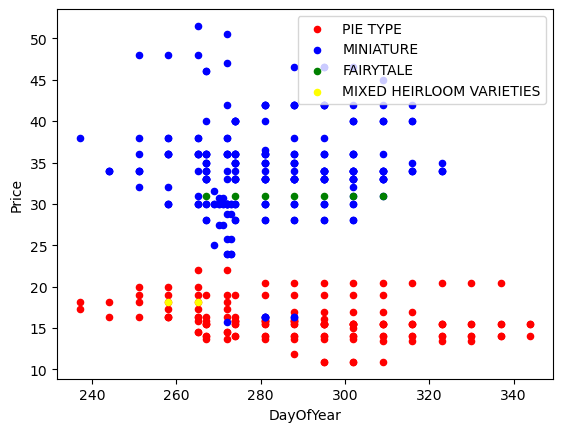

In [7]:
ax = None
colors = ['red','blue','green','yellow']
for i, var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety'] == var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

Our investigation suggests that variety has more effect on the overall price than the actual selling date. We can see this with a bar graph:

<AxesSubplot: xlabel='Variety'>

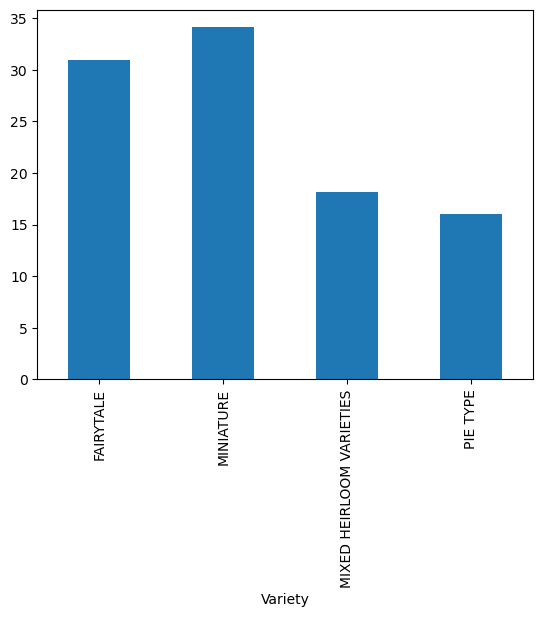

In [8]:
new_pumpkins.groupby(['Variety'])['Price'].mean().plot(kind='bar')

Let us focus for the moment only on one pumpkin variety, the 'pie type', and see what effect the date has on the price:

<AxesSubplot: xlabel='DayOfYear', ylabel='Price'>

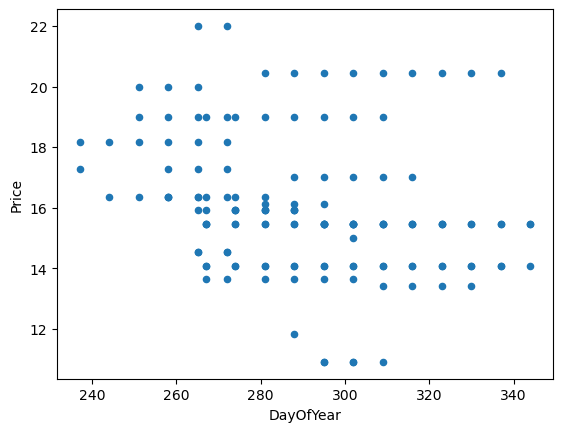

In [9]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price')

Let's calculate the correlation between Price and DayOfYear using corr function;

In [10]:
pie_pumpkins['Price'].corr(pie_pumpkins['DayOfYear'])

-0.2669192282197318

The score of -0.27  means that training a predictive model makes sense.It is a bit far from zero

Before training a linear regression model, it is important to make sure that our data is clean. Linear regression does not work well with missing values, thus it makes sense to get rid of all empty cells:


In [11]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int64  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 10.1+ KB


/tmp/ipykernel_786/3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


Another approach would be to fill those empty values with mean values from the corresponding column.



# Simple Linear Regression

To train our Linear Regression model, we will use the Scikit-learn library.



In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

We start by separating input values (features) and the expected output (label) into separate numpy arrays:

In [14]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

We had to perform reshape on the input data in order for the Linear Regression package to understand it correctly. Linear Regression expects a 2D-array as an input, where each row of the array corresponds to a vector of input features. In our case, since we have only one input - we need an array with shape N×1, where N is the dataset size. 

Andrew Ng explained this so well in his Machine Learning Course!



Then, we need to split the data into train and test datasets, so that we can validate our model after training:

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Finally, training the actual Linear Regression model takes only two lines of code. We define the LinearRegression object, and fit it to our data using the fit method:



In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

The LinearRegression object after fitting contains all the coefficients of the regression, which can be accessed using .coef_ property. 

In [17]:
lin_reg.coef_

array([-0.01751876])

In [18]:
lin_reg.intercept_

21.133734359909326

In our case, there is just one coefficient, which should be around -0.017. It means that prices seem to drop a bit with time, but not too much, around 2 cents per day. We can also access the intersection point of the regression with Y-axis using lin_reg.intercept_ - it will be around 21 in our case, indicating the price at the beginning of the year.


To see how accurate our model is, we can predict prices on a test dataset, and then measure how close our predictions are to the expected values. This can be done using mean square error (MSE) metrics, which is the mean of all squared differences between expected and predicted value.

In [20]:
pred = lin_reg.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean Error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean Error: 2.77 (17.2%)


Our error seems to be around 2 points, which is ~17%. Not too good. Another indicator of model quality is the **coefficient of determination**, which can be obtained like this:



In [23]:
score = lin_reg.score(X_train,y_train)
print(f'Model determination: {score:3.3}')

Model determination: 0.0446


If the value is 0, it means that the model does not take input data into account, and acts as the worst linear predictor, which is simply a mean value of the result. The value of 1 means that we can perfectly predict all expected outputs. In our case, the coefficient is around 0.04, which is quite low.

We can also plot the test data together with the regression line to better see how regression works in our case:

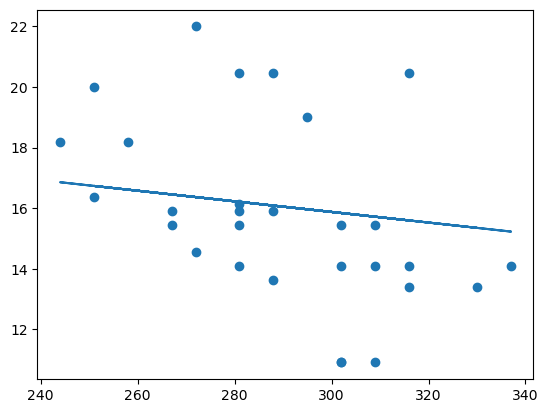

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)


# Polynomial Regression

Another type of Linear Regression is Polynomial Regression. While sometimes there's a linear relationship between variables - the bigger the pumpkin in volume, the higher the price - sometimes these relationships can't be plotted as a plane or straight line. 

Taking another look at the relationship between Date and Price. Does this scatterplot seem like it should necessarily be analyzed by a straight line? Can't prices fluctuate? In this case, we can try polynomial regression.



Polynomials are mathematical expressions that might consist of one or more variables and coefficients

Polynomial regression creates a curved line to better fit nonlinear data. In our case, if we include a squared DayOfYear variable into input data, we should be able to fit our data with a parabolic curve, which will have a minimum at a certain point within the year.

Scikit-learn includes a helpful pipeline API to combine different steps of data processing together. A pipeline is a chain of estimators. In our case, we will create a pipeline that first adds polynomial features to our model, and then trains the regression:

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(2),LinearRegression())
pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Using PolynomialFeatures(2) means that we will include all second-degree polynomials from the input data. In our case it will just mean DayOfYear2, but given two input variables X and Y, this will add X2, XY and Y2. We may also use higher degree polynomials if we want.

Pipelines can be used in the same manner as the original LinearRegression object, i.e. we can fit the pipeline, and then use predict to get the prediction results.

In [27]:
pipe_pred = pipeline.predict(X_test)


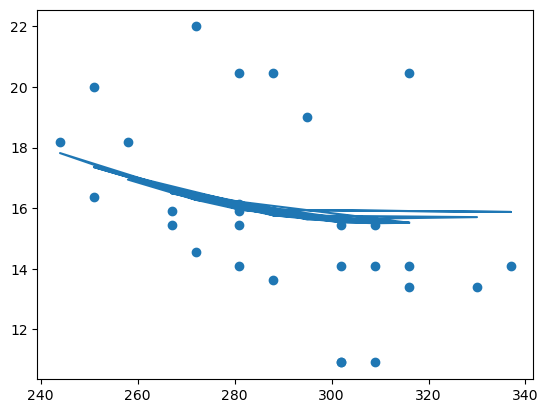

In [28]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pipe_pred)


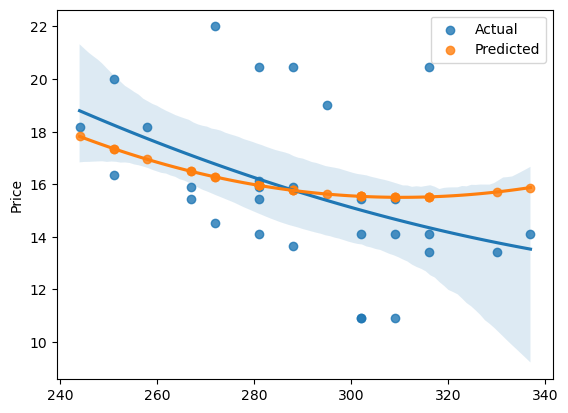

In [29]:
import seaborn as sns
sns.regplot(x=X_test, y=y_test, order=2, scatter=True, fit_reg=True, label='Actual')
sns.regplot(x=X_test, y=pipe_pred, order=2, scatter=True, fit_reg=True, label='Predicted')

# Adding a legend and displaying the plot
plt.legend()
plt.show()

In [30]:
pipeline_mse = np.sqrt(mean_squared_error(y_test,pipe_pred))
print(f'Mean Error: {pipeline_mse:3.3} ({pipeline_mse/np.mean(pipe_pred)*100:3.3}%)')
pipeline_score = pipeline.score(X_train,y_train)
print(f'Pipeline Score: {pipeline_score:3.3}')

Mean Error: 2.73 (17.0%)
Pipeline Score: 0.0764


Using Polynomial Regression, we can get slightly lower MSE and higher determination, but not significantly. We need to take into account other features!

You can see that the minimal pumpkin prices are observed somewhere around Halloween. How can you explain this?


In [33]:
final_model = pipeline.named_steps['linearregression']
coefficients = final_model.coef_
intercept = final_model.intercept_
print(f'Coefficients: {coefficients}\n')
print(f'Intercept: {intercept}')

Coefficients: [ 0.         -0.32646603  0.00052594]

Intercept: 66.16630246971742


# Categorical Features

In the ideal world, we want to be able to predict prices for different pumpkin varieties using the same model. However, the Variety column is somewhat different from columns like Month, because it contains non-numeric values. Such columns are called categorical.

Here you can see how average price depends on variety:

<AxesSubplot: xlabel='Variety'>

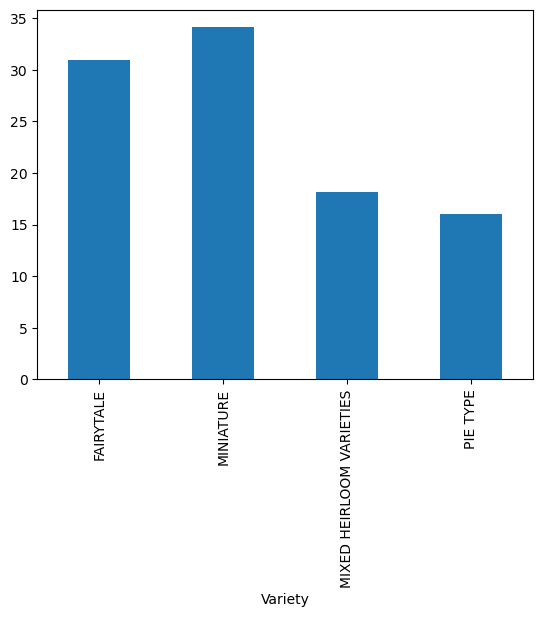

In [35]:
new_pumpkins.groupby(['Variety'])['Price'].mean().plot(kind='bar')

To take variety into account, we first need to convert it to numeric form, or encode it. There are several way we can do it:

- Simple numeric encoding will build a table of different varieties, and then replace the variety name by an index in that table. This is not the best idea for linear regression, because linear regression takes the actual numeric value of the index, and adds it to the result, multiplying by some coefficient. In our case, the relationship between the index number and the price is clearly non-linear, even if we make sure that indices are ordered in some specific way.
- One-hot encoding will replace the Variety column by 4 different columns, one for each variety. Each column will contain 1 if the corresponding row is of a given variety, and 0 otherwise. This means that there will be four coefficients in linear regression, one for each pumpkin variety, responsible for "starting price" (or rather "additional price") for that particular variety.


The code below shows how we can one-hot encode the variety:

In [36]:
pd.get_dummies(new_pumpkins['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


To train linear regression using one-hot encoded variety as input, we just need to initialize X and y data correctly:

In [44]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [46]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
cat_lin_model = LinearRegression()
cat_lin_model.fit(X_train,y_train)
cat_lin_model_pred = cat_lin_model.predict(X_test)


In [47]:
print(f'Cat Linear Model Coefficient: {cat_lin_model.coef_}\n')
print(f'Cat Linear Model Intercept: {cat_lin_model.intercept_}')

Cat Linear Model Coefficient: [ 6.1512809   9.09350578 -6.66690092 -8.57788577]

Cat Linear Model Intercept: 24.84871909888357


In [49]:
print(f'Determination Score: {cat_lin_model.score(X_train,y_train)}\n')
cat_mse = np.sqrt(mean_squared_error(y_test,cat_lin_model_pred))
print(f'Mean Error: {cat_mse:3.3} ({cat_mse/np.mean(cat_lin_model_pred)*100:3.3}%)')

Determination Score: 0.7773423440374306

Mean Error: 5.19 (19.3%)


The mean squared error is about the same, but we get much higher coefficient of determination (~77%).

To get even more accurate predictions, we can take more categorical features into account, as well as numeric features, such as Month or DayOfYear. To get one large array of features, we can use join:

```py
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']
```

# Categorical + Numerical Model

In [50]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
cat_num_model = LinearRegression()
cat_num_model.fit(X_train,y_train)
cat_num_model_pred = cat_num_model.predict(X_test)


In [53]:
print(f'Cat Numerical Model Coefficient: {cat_num_model.coef_}\n')
print(f'Cat Numerical Model Intercept: {cat_num_model.intercept_}')

Cat Numerical Model Coefficient: [ 1.35758206  4.31503779 -1.44045616 -4.2321637  -0.66658493 -4.77143158
 -0.50432668  0.35012449  1.71061598  1.41540536 -0.31975966  1.04248523
 -0.27823785  6.97263537 -5.61751067 -5.17893364 -8.37150942  4.61571576
 11.84129789 -2.90657058]

Cat Numerical Model Intercept: 31.120231974368814


In [56]:
print(f'Determination Score: {cat_num_model.score(X_train,y_train):3.2}\n')
cat_num_mse = np.sqrt(mean_squared_error(y_test,cat_num_model_pred))
print(f'Mean Error: {cat_num_mse:3.3} ({cat_num_mse/np.mean(cat_num_model_pred)*100:3.3}%)')

Determination Score: 0.94

Mean Error: 2.66 (9.86%)


# Final Best Model: Combining all we've learnt

To make the best model, we can use combined (one-hot encoded categorical + numeric) data from the above example together with Polynomial Regression. Here is the complete code for your convenience: